## 이상치 처리

<li>이상치 :극단적인 값 또는 존재할 수 없는 값 </li>
<li>이상치 처리 <br> 1) 행제거 또는 2) 값을 채워넣음(대표값 또는 예측값으로)</li>

In [1]:
import pandas as pd

In [2]:
students = pd.read_csv("data/students.csv")
students

,english,math,class
0,100,999,1
1,90,90,1
2,80,80,1
3,70,20,1
4,20,90,2
5,90,100,2
6,80,80,2
7,90,99,A


In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   english  8 non-null      int64 
 1   math     8 non-null      int64 
 2   class    8 non-null      object
dtypes: int64(2), object(1)
memory usage: 324.0+ bytes


#### 1) 범주형 변수의  이상치 확인 예

1반과 2반만 존재하는 학교라고 예를들자. 1과 2외의 데이터는 이상치

In [4]:
# 클래스 열의 값이 1 또는 2인 행만
students[ students["class"].isin(['1','2'])  ]

,english,math,class
0,100,999,1
1,90,90,1
2,80,80,1
3,70,20,1
4,20,90,2
5,90,100,2
6,80,80,2


In [5]:
# 클래스 열의 값이 1 또는 2가 아닌 행만 <--- 이상치
students[~ students["class"].isin(['1','2'])  ]

,english,math,class
7,90,99,A


#### 이상치를 가진 행 삭제 예

In [6]:
students = students[ students["class"].isin(['1','2'])  ]

In [7]:
students

,english,math,class
0,100,999,1
1,90,90,1
2,80,80,1
3,70,20,1
4,20,90,2
5,90,100,2
6,80,80,2


#### 2) 연속형 변수의  이상치 확인 예

<img src="etc/4_boxplot.png" />
<img src="etc/5_boxplot.png" />

<img src="etc/3_boxplot.png" />

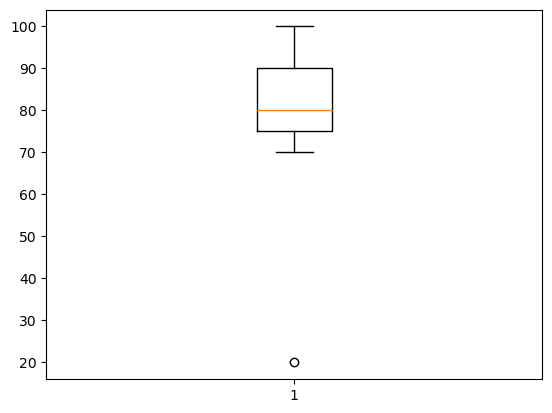

In [8]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline


a =plt.boxplot(students['english'])
plt.show()

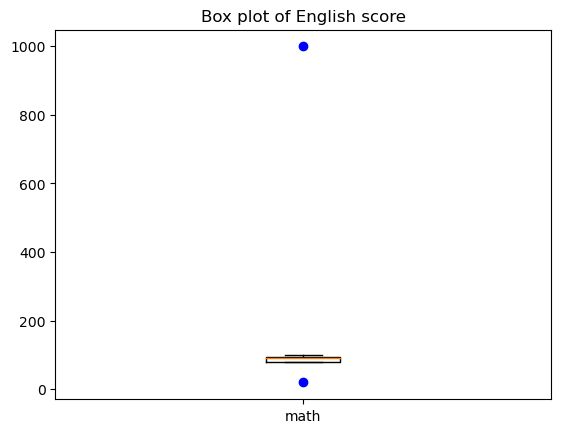

In [9]:
plt.boxplot(students['math'], sym="bo")
plt.title('Box plot of English score')
plt.xticks([1], ['math'])
plt.show()

연속적 변수 이상치 구하기 예

In [10]:
import numpy as np
Q1 = np.percentile(students["math"], 25)
Q3 = np.percentile(students["math"], 75)
IQR = Q3 - Q1
outlier_step = 1.5 * IQR

outlier_step

22.5

In [11]:
# 연속적 변수 이상치 출력
students[(students["math"] <  Q1 - outlier_step ) | (students["math"] > Q3 + outlier_step)]

,english,math,class
0,100,999,1
3,70,20,1
